Dataset: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/2

### Download and Prepare data

In [1]:
from pathlib import Path

dataset_path = Path('YOLOV5')
dataset_path.mkdir(parents=True, exist_ok=True)
dataset_path

PosixPath('YOLOV5')

In [2]:
!pwd

/content


In [3]:
%cd YOLOV5

/content/YOLOV5


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OUx13M4wAVBt0qeZboyR")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
dataset = project.version(2).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-2 in yolov5pytorch:: 100%|██████████| 6472/6472 [00:01<00:00, 5591.76it/s]


In [1]:
import os
from pathlib import Path
total_train = Path('/content/YOLOV5/PPE_Detection-2/train/images')
total_val = Path('/content/YOLOV5/PPE_Detection-2/valid/images')
total_test = Path('/content/YOLOV5/PPE_Detection-2/test/images')

total_train = os.listdir(total_train)
total_val = os.listdir(total_val)
total_test = os.listdir(total_test)

print(f'Total images in Train folder : {len(total_train)}\nTotal images in Val folder : {len(total_val)}\nTotal images in Test folder : {len(total_test)}')

Total images in Train folder : 2271
Total images in Val folder : 637
Total images in Test folder : 322


In [2]:
for dirpath, dirnames, filenames in os.walk('/content/YOLOV5/PPE_Detection-2'):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 3 directories and 3 images in '/content/YOLOV5/PPE_Detection-2'.
There are 2 directories and 0 images in '/content/YOLOV5/PPE_Detection-2/train'.
There are 0 directories and 2271 images in '/content/YOLOV5/PPE_Detection-2/train/images'.
There are 0 directories and 2271 images in '/content/YOLOV5/PPE_Detection-2/train/labels'.
There are 2 directories and 0 images in '/content/YOLOV5/PPE_Detection-2/valid'.
There are 0 directories and 637 images in '/content/YOLOV5/PPE_Detection-2/valid/images'.
There are 0 directories and 637 images in '/content/YOLOV5/PPE_Detection-2/valid/labels'.
There are 2 directories and 0 images in '/content/YOLOV5/PPE_Detection-2/test'.
There are 0 directories and 322 images in '/content/YOLOV5/PPE_Detection-2/test/images'.
There are 0 directories and 322 images in '/content/YOLOV5/PPE_Detection-2/test/labels'.


2.0
2.0
4.0
1.0


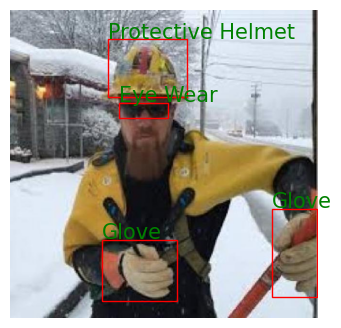

2.0
5.0
3.0
3.0
4.0


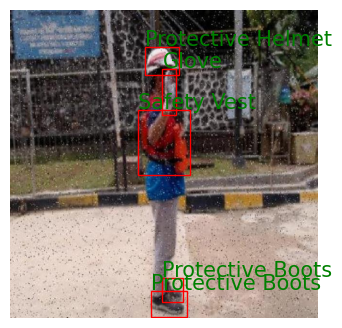

4.0
1.0
0.0
2.0
2.0
5.0
3.0


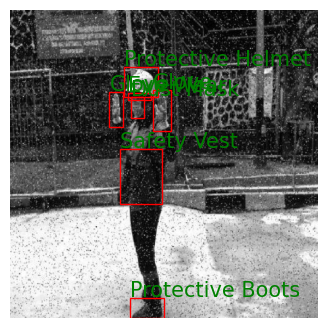

1.0


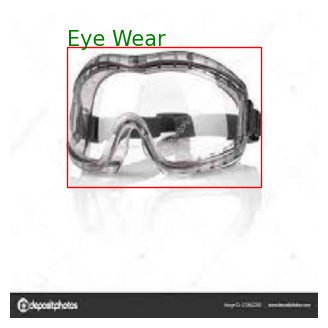

0.0
2.0
2.0
3.0
3.0


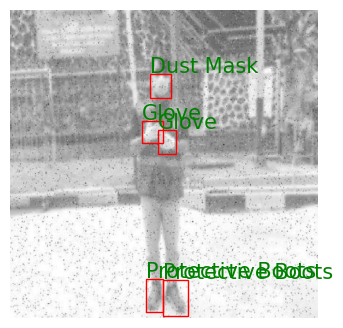

0.0
2.0
2.0
3.0
3.0


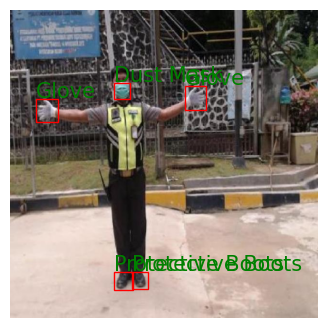

2.0
2.0
3.0
3.0


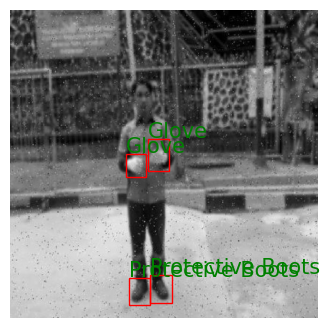

2.0
4.0


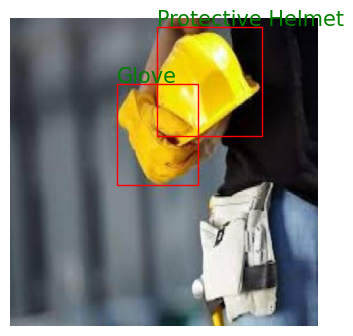

5.0


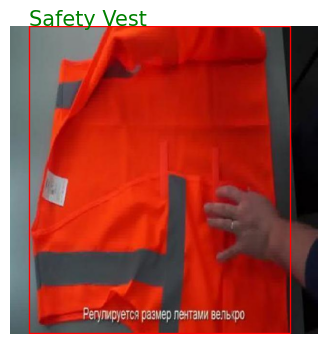

0.0
4.0


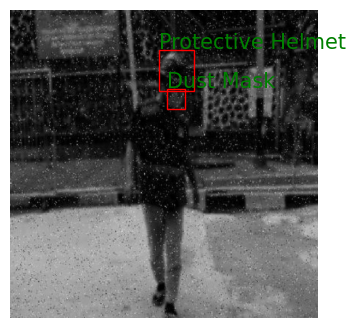

In [3]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Path to YOLOv5 train set
train_images_dir = "/content/YOLOV5/PPE_Detection-2/train/images"
train_labels_dir = "/content/YOLOV5/PPE_Detection-2/train/labels"

class_names = ['Dust Mask', 'Eye Wear', 'Glove', 'Protective Boots', 'Protective Helmet', 'Safety Vest', 'Shield']

# Get list of image files
image_files = os.listdir(train_images_dir)

# Choose 10 random images
random_images = random.sample(image_files, 10)

# Plot images with bounding boxes
for image_name in random_images:
    image_path = os.path.join(train_images_dir, image_name)
    label_path = os.path.join(train_labels_dir, image_name.replace(".jpg", ".txt"))

    # Read image
    image = Image.open(image_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(image)

    # Read bounding box annotations
    with open(label_path, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            print(class_id)
            x_min = (x_center - width / 2) * image.width
            y_min = (y_center - height / 2) * image.height
            rect_width = width * image.width
            rect_height = height * image.height

            # Create a Rectangle patch
            rect = patches.Rectangle((x_min, y_min), rect_width, rect_height, linewidth=1, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            plt.gca().add_patch(rect)
            class_name = class_names[int(class_id)]
            plt.text(x_min, y_min - 2, class_name, fontsize=15, color='g')


    plt.axis('off')
    plt.show()


In [4]:
!pwd

/content


In [5]:
%cd YOLOV5

/content/YOLOV5


In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16582, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 16582 (delta 30), reused 39 (delta 18), pack-reused 16522
Receiving objects: 100% (16582/16582), 15.06 MiB | 22.55 MiB/s, done.
Resolving deltas: 100% (11389/11389), done.


In [7]:
%cd yolov5

/content/YOLOV5/yolov5


In [8]:
!pwd

/content/YOLOV5/yolov5


In [9]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_

In [1]:
!pwd

/content


In [2]:
%cd YOLOV5/yolov5

/content/YOLOV5/yolov5


## Model Training

In [7]:
!python train.py --batch 16 --epochs 30 --data train_data.yaml --cfg models/yolov5s.yaml --hyp data/hyps/hyp.scratch-high.yaml --name RESULTS

2024-05-08 06:24:23.609578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 06:24:23.609631: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 06:24:23.611131: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=train_data.yaml, hyp=data/hyps/hyp.scratch-high.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=Fals

## Best Model evaluation on Test

In [13]:
!python val.py --data test_data.yaml --weights runs/train/RESULTS/weights/best.pt --batch-size 16 --conf-thre 0.3 --iou-thres 0.6

val: data=test_data.yaml, weights=['runs/train/RESULTS/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.3, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.3 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-307-g920c721e Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/YOLOV5/PPE_Detection-2/test/labels... 322 images, 0 backgrounds, 0 corrupt: 100% 322/322 [00:00<00:00, 551.14it/s]
val: New cache created

## Making predictions on Test images

In [15]:
!python detect.py --weights runs/train/RESULTS/weights/best.pt --conf 0.4 --source ../PPE_Detection-2/test/images


detect: weights=['runs/train/RESULTS/weights/best.pt'], source=../PPE_Detection-2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/322 /content/YOLOV5/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg: 640x640 1 Dust Mask, 2 Gloves, 2 Protective Helmets, 11.5ms
image 2/322 /content/YOLOV5/PPE_Detection-2/test/images/20220721_161946_jpg.rf.905c375aa964159f9edab2a55a6e7476.jpg: 640x640 (no detections), 11.

## Inference on Video

### Test video : https://www.youtube.com/watch?v=oW6m7fABIGs&t=17s

In [21]:
!python detect.py --weights runs/train/RESULTS/weights/best.pt --conf 0.4 --source ../../Construction_Footage.mp4

detect: weights=['runs/train/RESULTS/weights/best.pt'], source=../../Construction_Footage.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-307-g920c721e Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1260) /content/Construction_Footage.mp4: 384x640 (no detections), 52.6ms
video 1/1 (2/1260) /content/Construction_Footage.mp4: 384x640 (no detections), 8.8ms
video 1/1 (3/1260) /content/Construction_Footage.mp4: 384x640 (no detections), 7.5ms
video 1/1 (4/1260) /content/Construction_Footage.mp4: 384

Class Counts: defaultdict(<class 'int'>, {'Eye Wear': 87, 'Glove': 304, 'Dust Mask': 161, 'Safety Vest': 267, 'Protective Boots': 279, 'Protective Helmet': 287, 'Shield': 14})


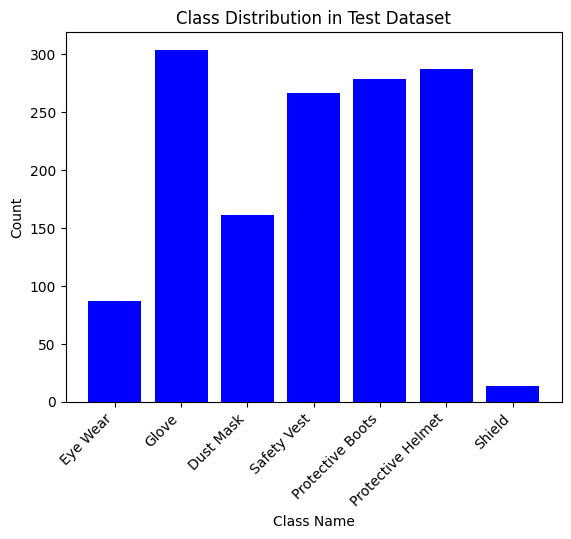

In [20]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt


#class_names = ['Dust Mask', 'Eye Wear', 'Glove', 'Protective Boots', 'Protective Helmet', 'Safety Vest', 'Shield']
def read_class_names(class_names_file):
    with open(class_names_file, 'r') as file:
        class_names = [line.strip() for line in file]
    return class_names

def count_classes_in_dataset(label_dir, class_names):
    class_counts = defaultdict(int)

    # Loop through each label file in the directory
    for label_file in os.listdir(label_dir):
        if label_file.endswith(".txt"):
            label_path = os.path.join(label_dir, label_file)

            # Read YOLO label file
            with open(label_path, 'r') as file:
                lines = file.readlines()

            # Extract class information and count occurrences
            for line in lines:
                class_id, _, _, _, _ = map(float, line.split())
                class_id = int(class_id)
                class_name = class_names[class_id]
                class_counts[class_name] += 1

    return class_counts

def visualize_class_distribution(class_counts, title):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.bar(classes, counts, color='blue')
    plt.xlabel('Class Name')
    plt.ylabel('Count')
    plt.title(f'Class Distribution in {title} Dataset')
    plt.xticks(rotation=45, ha='right')  # Rotate class names for better visibility
    plt.show()

# Example usage
label_directory = '../PPE_Detection-2/test/labels'  # Replace with the path to your test label directory
class_names_file = 'class_names.txt'  # Replace with the path to your class names file
class_names = read_class_names(class_names_file)

class_counts = count_classes_in_dataset(label_directory, class_names)
print("Class Counts:", class_counts)

# Optional: Visualize the class distribution
visualize_class_distribution(class_counts, title='Test')


Class Counts: defaultdict(<class 'int'>, {'Safety Vest': 592, 'Glove': 631, 'Dust Mask': 308, 'Protective Boots': 608, 'Protective Helmet': 753, 'Eye Wear': 147, 'Shield': 25})


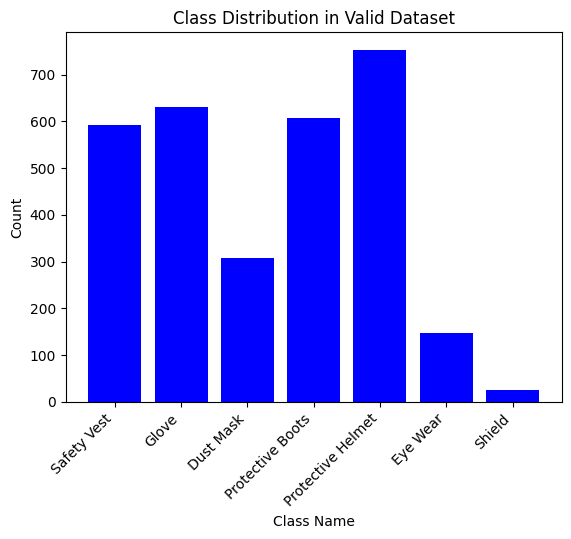

In [ ]:
label_directory = '../PPE_Detection-2/valid/labels'  # Replace with the path to your test label directory
class_names_file = 'class_names.txt'  # Replace with the path to your class names file
class_names = read_class_names(class_names_file)

class_counts = count_classes_in_dataset(label_directory, class_names)
print("Class Counts:", class_counts)

# Optional: Visualize the class distribution
visualize_class_distribution(class_counts, title = 'Valid')


In [22]:
!zip -r '../../yolov5.zip' ../yolov5

  adding: ../yolov5/ (stored 0%)
  adding: ../yolov5/requirements.txt (deflated 55%)
  adding: ../yolov5/classify/ (stored 0%)
  adding: ../yolov5/classify/.ipynb_checkpoints/ (stored 0%)
  adding: ../yolov5/classify/predict.py (deflated 68%)
  adding: ../yolov5/classify/tutorial.ipynb (deflated 81%)
  adding: ../yolov5/classify/train.py (deflated 65%)
  adding: ../yolov5/classify/val.py (deflated 65%)
  adding: ../yolov5/utils/ (stored 0%)
  adding: ../yolov5/utils/activations.py (deflated 69%)
  adding: ../yolov5/utils/google_app_engine/ (stored 0%)
  adding: ../yolov5/utils/google_app_engine/app.yaml (deflated 26%)
  adding: ../yolov5/utils/google_app_engine/additional_requirements.txt (deflated 22%)
  adding: ../yolov5/utils/google_app_engine/Dockerfile (deflated 47%)
  adding: ../yolov5/utils/plots.py (deflated 64%)
  adding: ../yolov5/utils/torch_utils.py (deflated 64%)
  adding: ../yolov5/utils/loss.py (deflated 69%)
  adding: ../yolov5/utils/general.py (deflated 66%)
  adding: 